In [1]:
pwd 

'/work/hpc/potato/SinoNom/src/data/components'

In [1]:
import json 
import numpy as np
from analyzer import Analyzer

In [2]:
import matplotlib.pyplot as plt

# Test

In [26]:
dataset = dict()
with open("/data/hpc/potato/sinonom/data/wb_recognition_dataset/manifest.json", "r") as file:
    dataset = json.load(file)

In [27]:
cached_dataset = dict()
with open("/data/hpc/potato/sinonom/data/wb_recognition_dataset/manifest_split.json", "r") as file:
    cached_dataset = json.load(file)

In [28]:
train_dataset = dataset['train']
train_cached_dataset = cached_dataset['train']

In [29]:
keys = list(train_dataset.keys())

In [30]:
count = [len(train_dataset[key]) for key in keys]
cached_count = [len(train_cached_dataset[key]) for key in keys]

In [31]:
x = range(0, len(count))

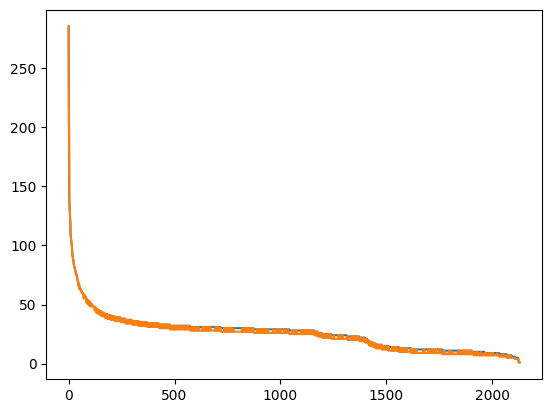

In [32]:
plt.plot(x, count)
plt.plot(x, cached_count)
plt.show()

Seems like it really just mildly downsample, really gud

In [33]:
val_dataset = dataset['val']
cached_dataset['val'].update(cached_dataset['cache'])
val_cached_dataset = cached_dataset['val']


In [34]:
val_cached_dataset?

Type:        dict
String form: {'1677': ['381.jpg', '388.jpg', '373.jpg', '392.jpg', '390.jpg', '387.jpg', '389.jpg', '383.jpg', <...> , '467': ['copy/467_19_467.png'], '647': ['copy/647_26_647.png'], '954': ['copy/954_19_954.png']}
Length:      2130
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)

2130 labels shows that it covered the dataset

In [35]:
val_count = [len(val_dataset[key]) if key in val_dataset.keys() else 0 for key in keys]
val_cached_count = [len(val_cached_dataset[key]) for key in keys]

In [36]:
diff = np.sum(cached_count) + np.sum(val_cached_count) - np.sum(val_count) - np.sum(count)
print(diff)

5


Seems like it does it job !!! New manifest approved :D

In [37]:
count = [len(train_dataset[key]) for key in keys]
cached_count = [len(train_cached_dataset[key]) for key in keys]

In [38]:
values, count = np.unique(hard_sample_count, return_counts=True)

NameError: name 'hard_sample_count' is not defined

In [ ]:
pri

In [14]:
for vc in zip(values, count):
    print(vc)

(0, 463)
(1, 634)
(2, 247)
(3, 138)
(4, 123)
(5, 71)
(6, 53)
(7, 44)
(8, 39)
(9, 34)
(10, 33)
(11, 24)
(12, 18)
(13, 8)
(14, 22)
(15, 13)
(16, 11)
(17, 12)
(18, 12)
(19, 6)
(20, 9)
(21, 5)
(22, 4)
(23, 7)
(24, 4)
(25, 5)
(26, 4)
(27, 2)
(28, 6)
(29, 6)
(30, 1)
(31, 3)
(32, 4)
(33, 3)
(34, 3)
(35, 2)
(36, 3)
(37, 2)
(38, 2)
(39, 3)
(41, 1)
(42, 3)
(43, 4)
(44, 1)
(46, 1)
(47, 1)
(48, 2)
(49, 2)
(52, 2)
(53, 2)
(54, 1)
(56, 1)
(58, 1)
(60, 1)
(61, 2)
(62, 1)
(64, 1)
(65, 1)
(67, 1)
(68, 1)
(70, 3)
(74, 1)
(75, 2)
(78, 1)
(79, 1)
(90, 1)
(94, 1)
(100, 1)
(101, 1)
(104, 1)
(114, 1)
(172, 1)
(192, 1)
(255, 1)


# Analyzer

Test with different manifest to test features

In [15]:
analyzer = Analyzer("/work/hpc/potato/SinoNom_recognition/data/manifest.json", data_dir='/work/hpc/potato/SinoNom_recognition/data/wb_recognition_dataset', cache_dir='cache')

Total samples: 58205


In [4]:
v_mean, v_std, v_dist, v_upsample, v_missing = analyzer.valid_fill_label(0.9)

Mean: 2.339495798319328
Valid mean samples 2.339495798319328
Valid standard deviation 2.816942095782366
Missing labels 4605


In [5]:
print(v_dist)

[32  4  1 ...  0  0  0]


In [5]:
values = list(v_missing.values())
x = range(0, len(v_missing))

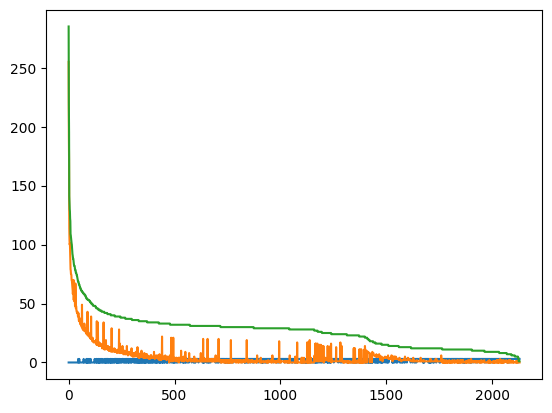

In [6]:
plt.plot(x, values)
plt.plot(x, list(analyzer.train_hard_dist.values()))
plt.plot(x, list(analyzer.train_full_dist.values()))
plt.show()

How the fuck can validation mean can be its own freaking adoijdaiupn standard deviation ????

In [16]:
miss_req, miss_h_req, miss_n_req = analyzer.query_train(v_missing, maximum_exploit=0.3)
up_req, up_h_req, up_n_req = analyzer.query_train(v_upsample, maximum_exploit=0.1)

In [17]:
v_d = np.array(list(analyzer.val_dist.values()))
hr_d = np.array(list(miss_h_req.values()))
nr_d = np.array(list(miss_n_req.values()))
r_d = np.array(list(miss_req.values()))


uhr_d = np.array(list(up_h_req.values()))
unr_d = np.array(list(up_n_req.values()))
ur_d = np.array(list(up_req.values()))

x = range(v_d.shape[0])
sample = v_d + hr_d + nr_d + uhr_d + unr_d 


In [9]:
np.sum(sample == 0)

5

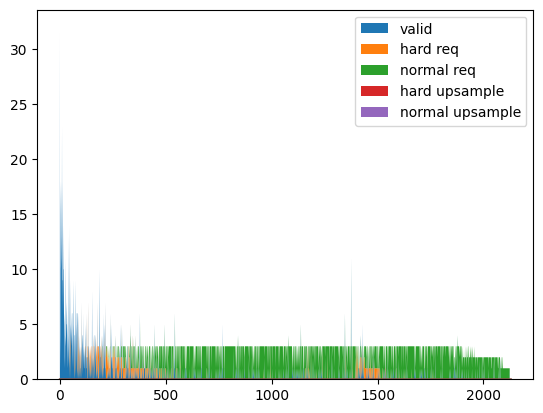

In [18]:

plt.stackplot(x, v_d, hr_d, nr_d, uhr_d, unr_d,
                labels=['valid', 'hard req', 'normal req', 'hard upsample', 'normal upsample'])
plt.legend()
plt.plot(x, unr_d)

plt.show()

Make dir /cache, and /cache/copy

In [19]:
analyzer.extract(miss_req, miss_h_req, miss_n_req, maximum_exploit=0.3, export="/work/hpc/potato/SinoNom_recognition/data/manifest_split.json", refresh=True)

Deleted all contents of the folder: /work/hpc/potato/SinoNom_recognition/data/wb_recognition_dataset/cache


Insufficient dataset, undergo copying samples label 96
Insufficient dataset, undergo copying samples label 221
Insufficient dataset, undergo copying samples label 467
Insufficient dataset, undergo copying samples label 647
Insufficient dataset, undergo copying samples label 954
Total samples differences: 5


In [12]:
w = analyzer.train_loss_weight()

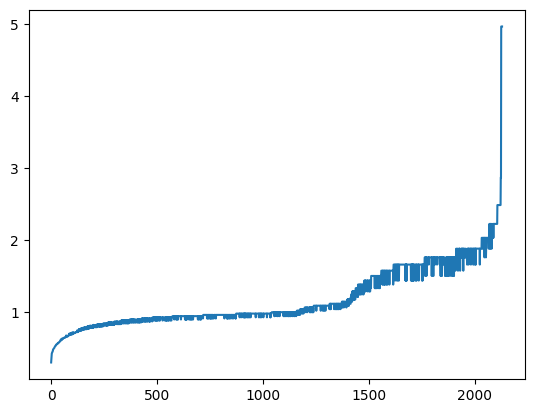

In [13]:
plt.plot(x, w)
plt.show()

In [13]:
w[0]

0.2940196835841068

In [20]:
analyzer.merge_cache_val(export="/work/hpc/potato/SinoNom_recognition/data/manifest_full.json")

cache_1630_nlvnpf-0137-01-029_crop_20.jpg
cache_1630_nlvnpf-0137-01-035_crop_12.jpg
cache_1630_nlvnpf-0140-01-002_crop_46.jpg
cache_449_nlvnpf-0137-01-016_crop_0.jpg
cache_449_nlvnpf-0137-01-009_crop_1.jpg
cache_449_nlvnpf-0137-01-017_crop_1.jpg
cache_560_nlvnpf-0137-01-027_crop_105.jpg
cache_560_nlvnpf-0140-01-002_crop_121.jpg
cache_560_nlvnpf-0137-01-013_crop_47.jpg
cache_1804_nlvnpf-0137-01-001_crop_88.jpg
cache_1804_nlvnpf-0174-03-006_crop_105.jpg
cache_1804_nlvnpf-0137-01-036_crop_104.jpg
cache_98_nlvnpf-0174-03-005_crop_80.jpg
cache_98_nlvnpf-0174-03-012_crop_125.jpg
cache_98_nlvnpf-0137-01-036_crop_74.jpg
cache_1768_nlvnpf-0137-01-041_crop_108.jpg
cache_1768_nlvnpf-0137-01-007_crop_77.jpg
cache_1768_nlvnpf-0140-01-007_crop_32.jpg
cache_996_nlvnpf-0137-01-024_crop_83.jpg
cache_996_nlvnpf-0137-01-004_crop_10.jpg
cache_996_nlvnpf-0137-01-016_crop_8.jpg
cache_494_nlvnpf-0140-01-003_crop_159.jpg
cache_494_nlvnpf-0140-01-010_crop_105.jpg
cache_494_nlvnpf-0140-01-012_crop_80.jpg
cache_

cache_1889_9_1889.png
cache_1896_1_1896.png
cache_1896_30_1896.png
cache_1896_21_1896.png
cache_1898_25_1898.png
cache_1898_6_1898.png
cache_1898_55_1898.png
cache_1899_6_1899.png
cache_1899_2_1899.png
cache_1899_22_1899.png
cache_1906_12_1906.png
cache_1906_13_1906.png
cache_1906_2_1906.png
cache_1913_43_1913.png
cache_1913_35_1913.png
cache_1913_41_1913.png
cache_1922_26_1922.png
cache_1922_50_1922.png
cache_1922_2_1922.png
cache_1927_39_1927.png
cache_1927_48_1927.png
cache_1927_16_1927.png
cache_1931_4_1931.png
cache_1931_40_1931.png
cache_1931_39_1931.png
cache_1932_13_1932.png
cache_1932_48_1932.png
cache_1932_2_1932.png
cache_1950_47_1950.png
cache_1950_18_1950.png
cache_1950_6_1950.png
cache_1954_33_1954.png
cache_1954_25_1954.png
cache_1954_3_1954.png
cache_1973_35_1973.png
cache_1973_40_1973.png
cache_1973_11_1973.png
cache_2013_19_2013.png
cache_2013_43_2013.png
cache_2013_17_2013.png
cache_2017_22_2017.png
cache_2017_41_2017.png
cache_2017_2_2017.png
cache_2034_48_2034.png


In [21]:
val_dataset = analyzer.val

In [22]:
import cv2

In [23]:
img = cv2.imread("/work/hpc/potato/SinoNom_recognition/data/wb_recognition_dataset/val/cache_copy_467_19_467.png")

In [24]:
img.shape

(64, 64, 3)

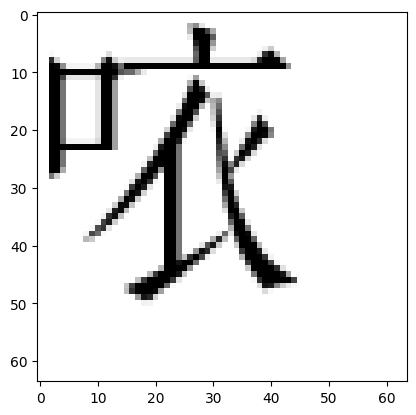

In [25]:
plt.imshow(img)